In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Ejercicio de clasificación
**Dr. Facundo A. Lucianna - Aprendizaje Automático - CEIoT - FIUBA**

Tenemos el dataset [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), el cuál es uno de los conjuntos de datos más clásicos y utilizados en Aprendizaje Automático. Fue introducido por el biólogo Ronald Fisher en 1936 y consiste en un conjunto de medidas de tres especies de flores iris: Iris setosa, Iris versicolor e Iris virginica.

Las características del dataset Iris son:

- Especies: Hay tres especies de iris en el dataset: **setosa**, **versicolor** y **virginica**.
- Atríbutos:
    - **Longitud del sépalo**: Longitud del sépalo en centímetros.
    - **Anchura del sépalo**: Anchura del sépalo en centímetros.
    - **Longitud del pétalo**: Longitud del pétalo en centímetros.
    - **Anchura del pétalo**: Anchura del pétalo en centímetros.
- Número de instancias: El dataset consta de 150 instancias en total, 50 por cada especie de iris.



In [2]:
# Cargamos el dataset Iris desde Seaborn
iris = sns.load_dataset('iris')

Como siempre, vemos un poco nuestros datos

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Vemos que no hay datos faltantes, y todos los atributos son numéricos.

Observese que tenemos una perfecta proporción de clases. 

Obtengamos algunas visualizaciones de los datos

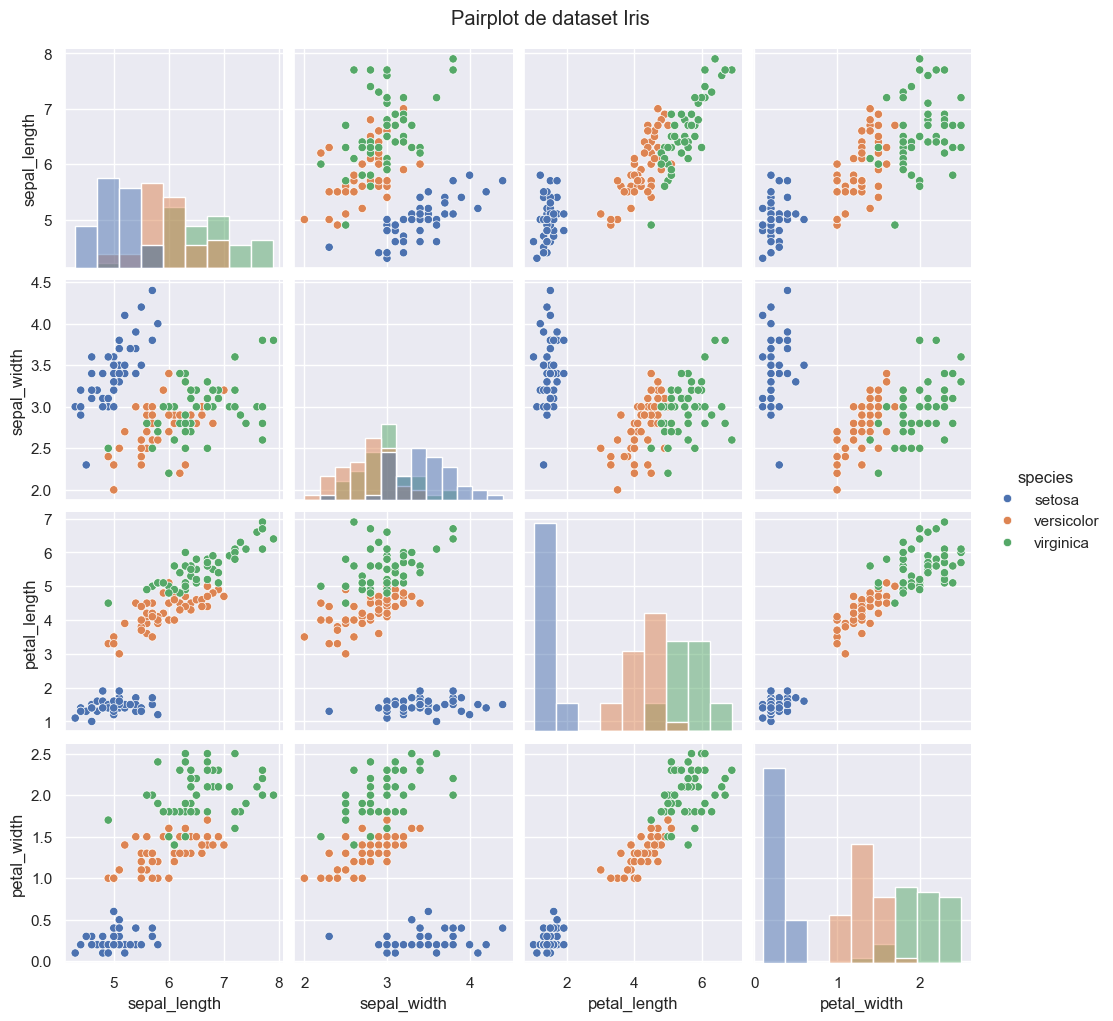

In [7]:
# Scatter plot de longitud vs. anchura del sépalo
sns.pairplot(iris, hue='species', diag_kind='hist')
plt.suptitle('Pairplot de dataset Iris', y=1.02)
plt.show()

Veamos por otro lado para cada atributo el diagrama de caja que nos dice con respecto a las especies.

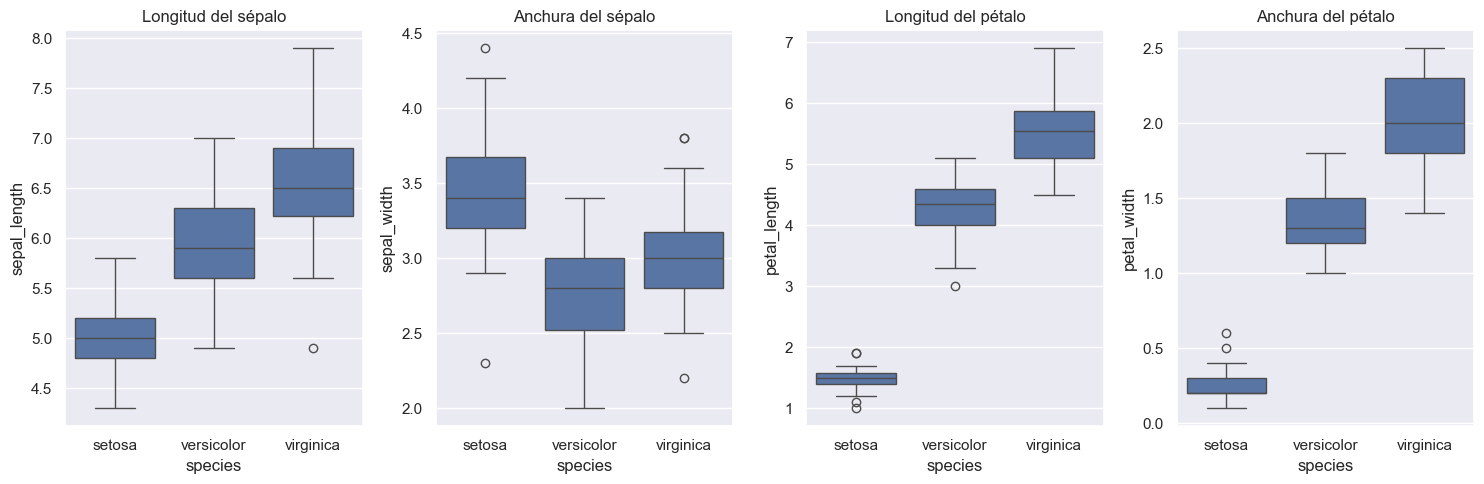

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.boxplot(x='species', y='sepal_length', data=iris, ax=axes[0])
sns.boxplot(x='species', y='sepal_width', data=iris, ax=axes[1])
sns.boxplot(x='species', y='petal_length', data=iris, ax=axes[2])
sns.boxplot(x='species', y='petal_width', data=iris, ax=axes[3])
axes[0].set_title('Longitud del sépalo')
axes[1].set_title('Anchura del sépalo')
axes[2].set_title('Longitud del pétalo')
axes[3].set_title('Anchura del pétalo')
plt.tight_layout()
plt.show()

---
### Primer modelo KNN

Vamos a usar el clasificador KNN de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), pero previo a aplicar el modelo, vamos a preparar el dataset:

In [9]:
# Separamos nuestras variables predictoras de la variable a predecir
X = iris.drop(columns="species")
y = iris["species"]

Separamos el dataset, nos quedamos con un 30% para el testeo.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

No es necesario estandaricemos las entradas ya que están en la misma escala (cm):

----

Armemos un modelo kNN con 3 vecinos y usando la distancia euclidiana:

*OBS: Vamos a usar sólo dos atributos para forzar algunos detalles de nuestras clasificaciones, dado que con todos los atributos como veremos más adelante, no tiene ningún problema para clasificar sin error.*

In [11]:
from sklearn.neighbors import KNeighborsClassifier

X_train_sepal = X_train[["sepal_length", "sepal_width"]]
X_test_sepal = X_test[["sepal_length", "sepal_width"]]

classifier_knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski", p=2)
classifier_knn.fit(X_train_sepal, y_train)

KNeighborsClassifier(n_neighbors=3)

Evaluemos como nos fue, para ello pasemos por las métricas de clasificación que vimos:

Empecemos por la métrica más básica, el [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score):

In [12]:
print(f"Porcentaje de muestras bien clasificadas: {(classifier_knn.score(X_test_sepal, y_test)*100)}%")

Porcentaje de muestras bien clasificadas: 75.55555555555556%


Parece que el modelo clasificó correctamente el 75% de las clases. Pero como le fue con cada especie, con quien tuvo más dificultad?

Veamoslo con la [matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#confusion-matrix):

In [13]:
from sklearn.metrics import confusion_matrix

y_pred_train = classifier_knn.predict(X_train_sepal)
y_pred_test = classifier_knn.predict(X_test_sepal)

In [14]:
cm_train_sepal = confusion_matrix(y_train, y_pred_train)
cm_sepal = confusion_matrix(y_test, y_pred_test)

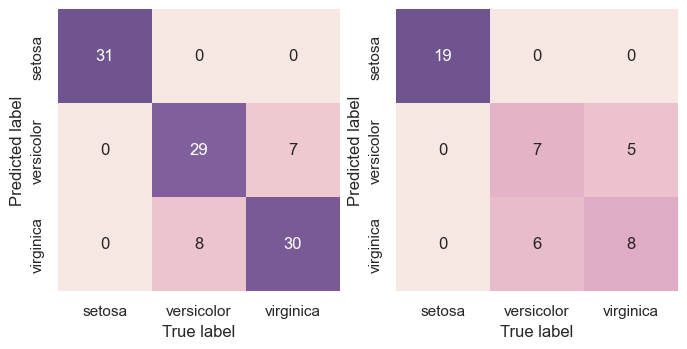

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(8,12))

sns.heatmap(cm_train_sepal.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[0],
            xticklabels=classifier_knn.classes_,
            yticklabels=classifier_knn.classes_)
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')

sns.heatmap(cm_sepal.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[1],
            xticklabels=classifier_knn.classes_,
            yticklabels=classifier_knn.classes_)
ax[1].set_xlabel('True label')
ax[1].set_ylabel('Predicted label');

Obtengamos el reporte de clasificación:

In [16]:
from sklearn.metrics import classification_report

In [17]:
print("Metricas con set de entrenamiento:")
print(classification_report(y_train, y_pred_train, target_names=classifier_knn.classes_))

Metricas con set de entrenamiento:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.81      0.78      0.79        37
   virginica       0.79      0.81      0.80        37

    accuracy                           0.86       105
   macro avg       0.87      0.86      0.86       105
weighted avg       0.86      0.86      0.86       105



In [18]:
print("Metricas con set de testeo:")
print(classification_report(y_test, y_pred_test, target_names=classifier_knn.classes_))

Metricas con set de testeo:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.58      0.54      0.56        13
   virginica       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



Observamos que en relación con los datos de prueba, la clasificación de la flot setosa no presentó dificultades. Sin embargo, tuvo problemas para distinguir entre las otras dos flores. Además, se observa un caso de sobreajuste, ya que las métricas de prueba son inferiores a las de entrenamiento.

Ahora, surge la pregunta de por qué elegimos 3 vecinos y la distancia euclidiana. ¿Existen otros conjuntos de hiperparámetros que podrían proporcionar mejores resultados?

Para responder a esto, podemos realizar una búsqueda de hiperparámetros utilizando validación cruzada en el conjunto de entrenamiento (recordemos que el conjunto de prueba solo se utiliza para la evaluación final).

Para esto, utilizaremos la búsqueda en grilla proporcionada por Scikit-Learn, la cual realiza automáticamente una evaluación sistemática de combinaciones de hiperparámetros mediante validación cruzada. Esto nos permite encontrar la combinación óptima de hiperparámetros que maximice el rendimiento del modelo en datos no vistos.

Para ello, usamos a [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [19]:
from sklearn.model_selection import GridSearchCV

# Definimos el modelo de KNN
knn = KNeighborsClassifier()

# Definimos los parámetros que queremos probar
param_grid = {
    'n_neighbors': range(2, 20),
    'metric': ['euclidean', 'manhattan']
}

# Inicializamos la búsqueda en grilla con validación cruzada
# Vamos a usar una validación cruzada de 3 folds
# Vamos a usar como metrica a maximizar a la exactitud.
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Esta búsqueda de grilla busca todas las combinaciones de valores, que hay veces que pueden ser muchísimas, para estos casos se
# recomienda usar RandomizedSearchCV de Scikit-Learn el cual busca a la azar N combinaciones. Es más rápido pero menos preciso.

In [20]:
# Realizamos la búsqueda en grilla al conjunto de entrenamiento
grid_search.fit(X_train_sepal, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 20)},
             scoring='accuracy')

In [21]:
# Obtenemos los mejores hiperparámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [22]:
print("Mejores hiperparámetros encontrados:")
print(best_params)
print("Mejor score de validación cruzada obtenido: {:.2f}".format(best_score))

Mejores hiperparámetros encontrados:
{'metric': 'manhattan', 'n_neighbors': 16}
Mejor score de validación cruzada obtenido: 0.82


Encontramos que con 16 vecinos y usando a la distancia de Manhattan mejoran los resultados. Evaluemos este modelo:

In [23]:
classifier_best_knn = KNeighborsClassifier(n_neighbors=16, metric="manhattan")
classifier_best_knn.fit(X_train_sepal, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=16)

In [24]:
y_best_pred_train = classifier_best_knn.predict(X_train_sepal)
y_best_pred_test = classifier_best_knn.predict(X_test_sepal)

cm_best_sepal = confusion_matrix(y_test, y_best_pred_test)

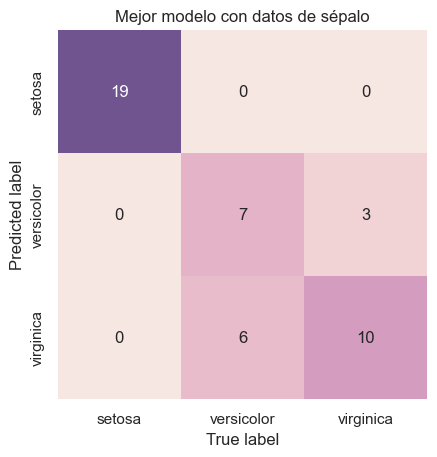

In [25]:
sns.heatmap(cm_best_sepal.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5),
            xticklabels=classifier_best_knn.classes_,
            yticklabels=classifier_best_knn.classes_)
plt.title("Mejor modelo con datos de sépalo");
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [26]:
print("Metricas con set de entrenamiento:")
print(classification_report(y_train, y_best_pred_train, target_names=classifier_best_knn.classes_))

Metricas con set de entrenamiento:
              precision    recall  f1-score   support

      setosa       1.00      0.97      0.98        31
  versicolor       0.69      0.78      0.73        37
   virginica       0.76      0.68      0.71        37

    accuracy                           0.80       105
   macro avg       0.82      0.81      0.81       105
weighted avg       0.81      0.80      0.80       105



In [27]:
print("Metricas con set de testeo:")
print(classification_report(y_test, y_best_pred_test, target_names=classifier_best_knn.classes_))

Metricas con set de testeo:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



Vemos que ahora las métricas entre los dos datasets no son tan diferentes, por lo que hay menos sobreajuste que antes (disminuimos el error de varianza).

----

Veamos por último que si usamos kNN con todos los atributos, el modelo clasifica perfectamente a todo sin ninguna dificultad y usando los parámetros por defecto.

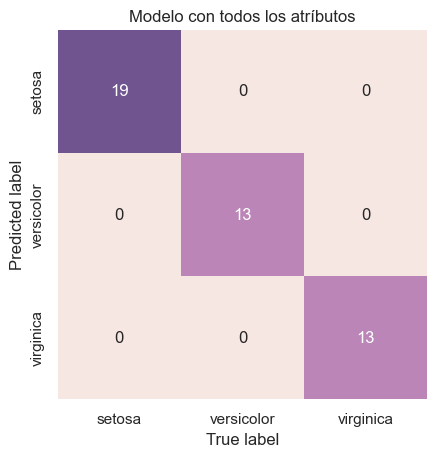

In [28]:
classifier_all_knn = KNeighborsClassifier()
classifier_all_knn.fit(X_train, y_train)

y_pred_best = classifier_all_knn.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm_best.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5),
            xticklabels=classifier_all_knn.classes_,
            yticklabels=classifier_all_knn.classes_)
plt.title("Modelo con todos los atríbutos");
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [29]:
print(classification_report(y_test, y_pred_best, target_names=classifier_all_knn.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Por último veamos cómo es la frontera de clasificación para el modelo kNN:

/Users/facundolucianna/Library/Caches/pypoetry/virtualenvs/apre-aut-ceiot-PH_AokOi-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


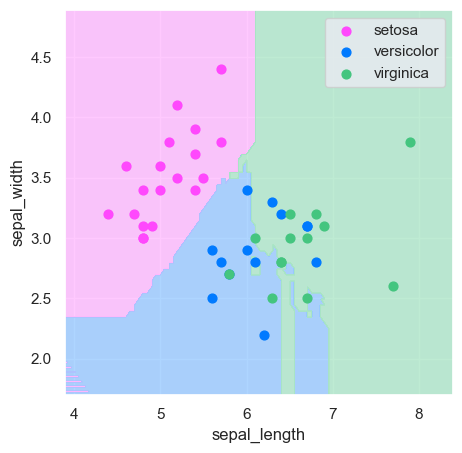

In [30]:
from auxiliary import plot_boundary

plot_boundary(X_test_sepal.to_numpy(), y_test.to_numpy(), classifier_best_knn, 
              step_x=(0.01, 0.01),
              max_x=(0.5, 0.5),
              min_x=(-0.5, -0.5),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=("setosa", "versicolor", "virginica"),
              labels_axis=("sepal_length", "sepal_width"),
              figsize=(5, 5),
              legend=True,
              point_size=40)

----
## Regresión logística

Ahora exploraremos la posibilidad de modelar la probabilidad para realizar clasificaciones con la **regresión logística**. 

Comenzaremos con un caso binario: por un lado, clasificaremos entre setosa y versicolor, y por otro lado, entre versicolor y virginica. En todos los casos, utilizaremos únicamente los datos del sépalo.

In [31]:
# Dataset para modelo 1:
X_train_model1 = X_train_sepal[y_train.isin(["setosa", "versicolor"])]
y_train_model1 = y_train[y_train.isin(["setosa", "versicolor"])]
X_test_model1 = X_test_sepal[y_test.isin(["setosa", "versicolor"])]
y_test_model1 = y_test[y_test.isin(["setosa", "versicolor"])]

X_train_model2 = X_train_sepal[y_train.isin(["virginica", "versicolor"])]
y_train_model2 = y_train[y_train.isin(["virginica", "versicolor"])]
X_test_model2 = X_test_sepal[y_test.isin(["virginica", "versicolor"])]
y_test_model2 = y_test[y_test.isin(["virginica", "versicolor"])]

Para el caso de la regresion logistica, usaremos a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) de Scikit-Learn:

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Entrenamos los modelos por máxima verosimilitud
log_reg_sepal_model_1 = LogisticRegression(random_state=42)
log_reg_sepal_model_1.fit(X_train_model1, y_train_model1)

log_reg_sepal_model_2 = LogisticRegression(random_state=42)
log_reg_sepal_model_2.fit(X_train_model2, y_train_model2)

LogisticRegression(random_state=42)

Veamos cómo nos fue con estos dos modelos:

In [34]:
y_pred_test_model1 = log_reg_sepal_model_1.predict(X_test_model1)
y_pred_test_model2 = log_reg_sepal_model_2.predict(X_test_model2)

In [35]:
cm_model1 = confusion_matrix(y_test_model1, y_pred_test_model1)
cm_model2 = confusion_matrix(y_test_model2, y_pred_test_model2)

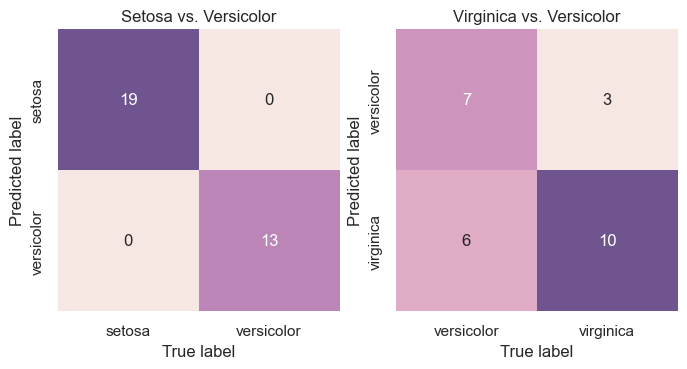

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(8,12))

sns.heatmap(cm_model1.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[0],
            xticklabels=log_reg_sepal_model_1.classes_,
            yticklabels=log_reg_sepal_model_1.classes_)
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')

sns.heatmap(cm_model2.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[1],
            xticklabels=log_reg_sepal_model_2.classes_,
            yticklabels=log_reg_sepal_model_2.classes_)
ax[1].set_xlabel('True label')
ax[1].set_ylabel('Predicted label')

ax[0].set_title("Setosa vs. Versicolor")
ax[1].set_title("Virginica vs. Versicolor");

In [37]:
print("Metricas Setosa vs. Versicolor:")
print(classification_report(y_test_model1, y_pred_test_model1, target_names=log_reg_sepal_model_1.classes_))

Metricas Setosa vs. Versicolor:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [38]:
print("Metricas Virginica vs. Versicolor:")
print(classification_report(y_test_model2, y_pred_test_model2, target_names=log_reg_sepal_model_2.classes_))

Metricas Virginica vs. Versicolor:
              precision    recall  f1-score   support

  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.65        26
   macro avg       0.66      0.65      0.65        26
weighted avg       0.66      0.65      0.65        26



No nos fue mucho mejor que el modelo inicial que hicimos de kNN. Pero ahora estamos modelando una probabilidad, por lo que no solo tenemos la predicción a que clase pertenece, sino la seguridad de la clasificación:

In [39]:
prob_pred_test_model2 = log_reg_sepal_model_2.predict_proba(X_test_model2)

Podemos observar que el modelo para la clasificación entre virginica y versicolor indica que la primera observación del conjunto de prueba es

In [40]:
print(f"El modelo predice que es: {y_pred_test_model2[0]}")

El modelo predice que es: versicolor


Pero además ahora vemos que con seguridad lo dice:

In [41]:
print(f"La probabilidad de que sea versicolor es: {prob_pred_test_model2[0, 0]}")
print(f"La probabilidad de que sea virginica es: {prob_pred_test_model2[0, 1]}")

La probabilidad de que sea versicolor es: 0.54598416922806
La probabilidad de que sea virginica es: 0.45401583077194


Observamos que la predicción no es tan segura. Además, el modelo está utilizando 0.5 como umbral, ¿pero podría haber obtenido un mejor rendimiento? Analicemos las curvas ROC de los modelos.

Scikit-learn tambien nos provee de estas metricas, tanto para crear la [curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) como calcular el [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc):

In [42]:
from sklearn.metrics import auc, roc_curve

# Para poder graficar debemos quedarnos con la probabilidad de una de las clases.
# En este caso elegimos a versicolor
prob_pred_test_model1 = log_reg_sepal_model_1.predict_proba(X_test_model1)[:, -1]
prob_pred_test_model2 = log_reg_sepal_model_2.predict_proba(X_test_model2)[:, 0]

fpr_model1, tpr_model1, _ = roc_curve(y_test_model1, prob_pred_test_model1, pos_label="versicolor")
fpr_model2, tpr_model2, thr_model2 = roc_curve(y_test_model2, prob_pred_test_model2, pos_label="versicolor")

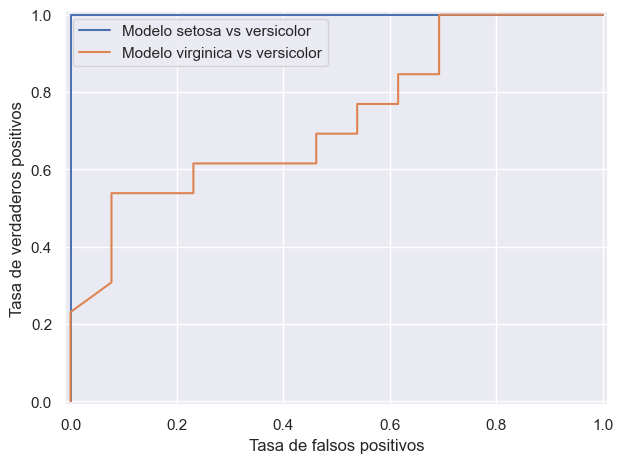

In [43]:
plt.plot(fpr_model1, tpr_model1, label="Modelo setosa vs versicolor")
plt.plot(fpr_model2, tpr_model2, label="Modelo virginica vs versicolor")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

Calculemos el área bajo la curva:

In [44]:
print("AUC")
print(f"Modelo setosa vs versicolor: {auc(fpr_model1, tpr_model1)}")
print(f"Modelo virginica vs versicolor: {auc(fpr_model2, tpr_model2)}")

AUC
Modelo setosa vs versicolor: 1.0
Modelo virginica vs versicolor: 0.7307692307692308


Vemos que el modelo que clasifica setosa vs versicolor se comporta perfectamente, en cambio, el modelo virginica vs versicolor es mediocre. Podemos mejorar las metricas de clasificación eligiendo un mejor umbral? 

Para ver esto, se puede elegir el umbral óptimo basandonos en diferentes criterios, como maximizar la sensibilidad (TPR) y minimizar la tasa de falsos positivos (FPR), o encontrar el punto más cercano al punto ideal (0, 1) en la curva ROC. Esto se puede hacer calculando la distancia euclidiana entre cada punto de la curva ROC y el punto (0, 1):

In [45]:
distances = np.sqrt((fpr_model2 - 0)**2 + (tpr_model2 - 1)**2)

# Encontramos el índice del umbral que minimiza la distancia euclidiana con el punto ideal:
optimal_idx = np.argmin(distances)
optimal_threshold_model2 = thr_model2[optimal_idx]

print(f"El mejor umbral elegido es: {optimal_threshold_model2}")

El mejor umbral elegido es: 0.46946906834810676


Veamos ahora como cambian las métricas de clasificación con este umbral:

In [46]:
# Obtenemos las probabilidades de virginica
prob_pred_test_model2 = log_reg_sepal_model_2.predict_proba(X_test_model2)[:, 0]

# Usamos el umbral óptimo para hacer predicciones binarias
y_pred_binary_model2 = (prob_pred_test_model2 >= optimal_threshold_model2).astype(int)

# Convertimos las predicciones binarias a etiquetas de clase 'virginica' y 'versicolor'
y_pred_binary_model2 = np.where(y_pred_binary_model2 == 1, 'versicolor', 'virginica')

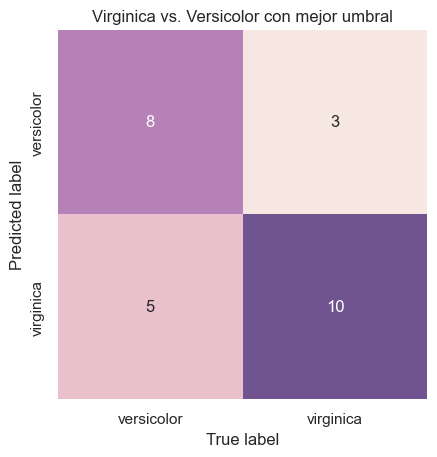

In [47]:
cm_best_model2 = confusion_matrix(y_test_model2, y_pred_binary_model2)

sns.heatmap(cm_best_model2.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5),
            xticklabels=log_reg_sepal_model_2.classes_,
            yticklabels=log_reg_sepal_model_2.classes_)
plt.title("Virginica vs. Versicolor con mejor umbral")
plt.xlabel('True label')
plt.ylabel('Predicted label');

Aquí observamos que al ajustar el umbral, una observación que antes se clasificaba incorrectamente como virginica ahora se clasifica correctamente como versicolor.

In [48]:
print("Metricas Virginica vs. Versicolor:")
print(classification_report(y_test_model2, y_pred_binary_model2, target_names=log_reg_sepal_model_2.classes_))

Metricas Virginica vs. Versicolor:
              precision    recall  f1-score   support

  versicolor       0.73      0.62      0.67        13
   virginica       0.67      0.77      0.71        13

    accuracy                           0.69        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.70      0.69      0.69        26



Observamos que este modelo tiene un rendimiento superior al del modelo kNN al comparar entre versicolor y virginica. Además, ahora tenemos la ventaja de poder expresar nuestra certeza en las predicciones.

----
## Regresión logistica multiple clases

Scikit-Learn nos permite clasificar multi-clase usando la regresión logística fácilmente. Vamos a construir dos modelos: uno utilizando solo el sépalo y otro utilizando todos los atributos.

In [49]:
log_reg_sepal = LogisticRegression(random_state=42)
log_reg_sepal.fit(X_train_sepal, y_train)

log_reg_all = LogisticRegression(random_state=42)
log_reg_all.fit(X_train, y_train)

y_pred_test_sepal = log_reg_sepal.predict(X_test_sepal)
y_pred_test_all = log_reg_all.predict(X_test)

Veamos las métricas de evaluación:

In [50]:
cm_model_sepal = confusion_matrix(y_test, y_pred_test_sepal)
cm_model_all = confusion_matrix(y_test, y_pred_test_all)

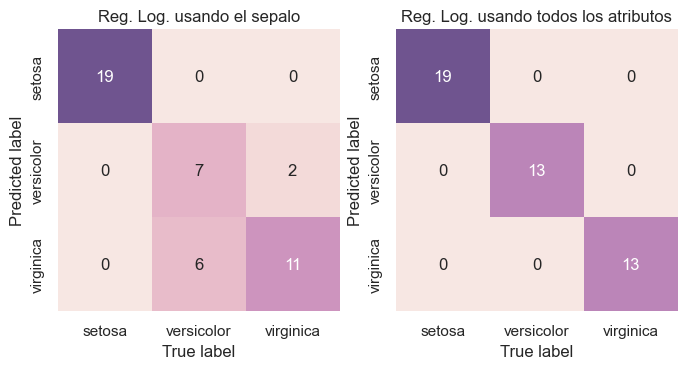

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(8,12))

sns.heatmap(cm_model_sepal.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[0],
            xticklabels=log_reg_sepal.classes_,
            yticklabels=log_reg_sepal.classes_)
ax[0].set_xlabel('True label')
ax[0].set_ylabel('Predicted label')

sns.heatmap(cm_model_all.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5), ax=ax[1],
            xticklabels=log_reg_all.classes_,
            yticklabels=log_reg_all.classes_)
ax[1].set_xlabel('True label')
ax[1].set_ylabel('Predicted label')

ax[0].set_title("Reg. Log. usando el sepalo")
ax[1].set_title("Reg. Log. usando todos los atributos");

In [52]:
print("Reg. Log. usando el sepalo:")
print(classification_report(y_test, y_pred_test_sepal, target_names=log_reg_sepal.classes_))

Reg. Log. usando el sepalo:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



In [53]:
print("Reg. Log. usando todos los atributos:")
print(classification_report(y_test, y_pred_test_all, target_names=log_reg_all.classes_))

Reg. Log. usando todos los atributos:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Observamos que la regresión logística multiclase tuvo un mejor desempeño que el mejor modelo de kNN, sin necesidad de realizar búsquedas adicionales ni trabajo extra. El modelo que utiliza todos los atributos no presentó dificultades para clasificar.

Para terminar, veamos la frontera de decisión:

/Users/facundolucianna/Library/Caches/pypoetry/virtualenvs/apre-aut-ceiot-PH_AokOi-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


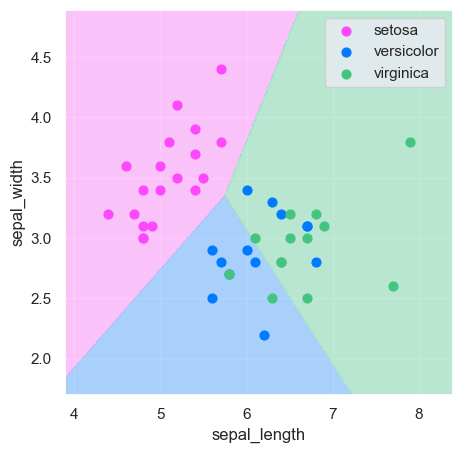

In [54]:
plot_boundary(X_test_sepal.to_numpy(), y_test.to_numpy(), log_reg_sepal, 
              step_x=(0.01, 0.01),
              max_x=(0.5, 0.5),
              min_x=(-0.5, -0.5),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=("setosa", "versicolor", "virginica"),
              labels_axis=("sepal_length", "sepal_width"),
              figsize=(5, 5),
              legend=True,
              point_size=40)

Comparando con la de kNN:

/Users/facundolucianna/Library/Caches/pypoetry/virtualenvs/apre-aut-ceiot-PH_AokOi-py3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


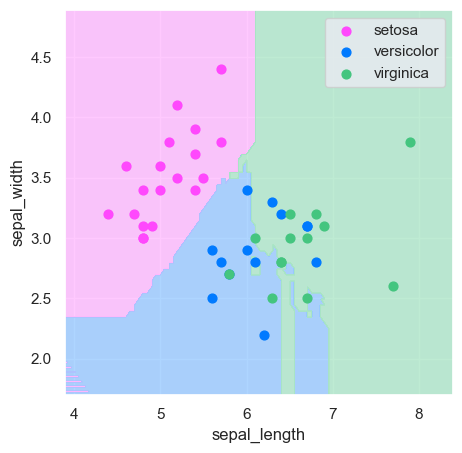

In [55]:
plot_boundary(X_test_sepal.to_numpy(), y_test.to_numpy(), classifier_best_knn, 
              step_x=(0.01, 0.01),
              max_x=(0.5, 0.5),
              min_x=(-0.5, -0.5),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=("setosa", "versicolor", "virginica"),
              labels_axis=("sepal_length", "sepal_width"),
              figsize=(5, 5),
              legend=True,
              point_size=40)